# Exploratory Descriptive Analysis (auxiliar file)

In [1]:
import sys
sys.path.append('C:\\Users\\Windows\\Desktop\\Repos\\insurance_prediction')

In [5]:
import os
import json
import utils
import requests
import pandas as pd
import numpy  as np
from ydata_profiling import ProfileReport


In [6]:
creds, _ = utils.load_credentials()

query = """
   SELECT * FROM insurance
   --limit 100
"""

df_raw = utils.getting_data_from_AWS_RDS(query = query,
                                         host = creds['host'],  
                                         port = creds['port'],  
                                         database = creds['database'], 
                                         user = creds['user'],
                                         password = creds['password'])

[Info] Data Frame with 762218 rows and 11 columns imported successfully.


In [7]:
df_raw['age'] = df_raw['age'].astype(int)
df_raw['driving_license'] = df_raw['driving_license'].astype(int)
df_raw['region_code'] = df_raw['region_code'].astype(int)
df_raw['previously_insured'] = df_raw['previously_insured'].astype(int)
df_raw['vintage'] = df_raw['vintage'].astype(int)
df_raw['response'] = df_raw['response'].astype(int)

In [9]:
utils.statistical_summary(dataframe = df_raw)

attributes     min       max     range          mean   median  \
0                   age    20.0      85.0      65.0     38.822584     36.0   
1       driving_license     0.0       1.0       1.0      0.997869      1.0   
2           region_code     0.0      52.0      52.0     26.388807     28.0   
3    previously_insured     0.0       1.0       1.0      0.458210      0.0   
4        annual_premium  2630.0  540165.0  537535.0  30564.389581  31669.0   
5  policy_sales_channel     1.0     163.0     162.0    112.034295    133.0   
6               vintage    10.0     299.0     289.0    154.347397    154.0   
7              response     0.0       1.0       1.0      0.122563      0.0   

            std       skew    kurtosis  var_coef  
0     15.511591   0.672538   -0.565659  0.399551  
1      0.046109 -21.595139  464.351248  0.046208  
2     13.229871  -0.115266   -0.867859  0.501344  
3      0.498251   0.167747   -1.971866  1.087384  
4  17213.132474   1.766084   34.004338  0.563176  
5     54.203924  -0.900006   -0.970812  0.483815  
6     83.671194   0.003030   -1.200688  0.542097  
7      0.327935   2.301901    3.298758  2.675639

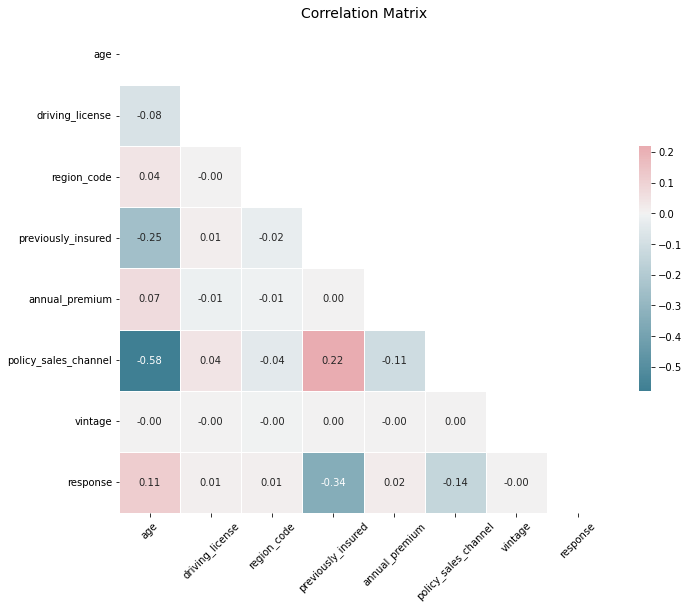

In [10]:
utils.correlation_matrix(dataframe = df_raw)

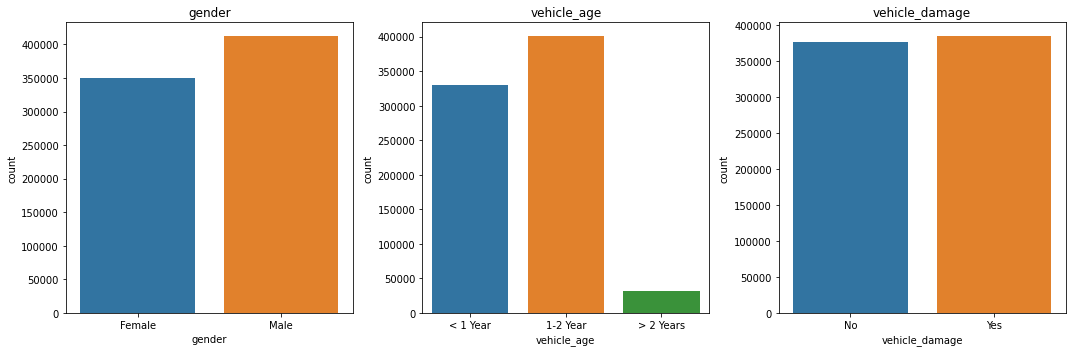

In [11]:
utils.plot_categorical_features(dataframe = df_raw)

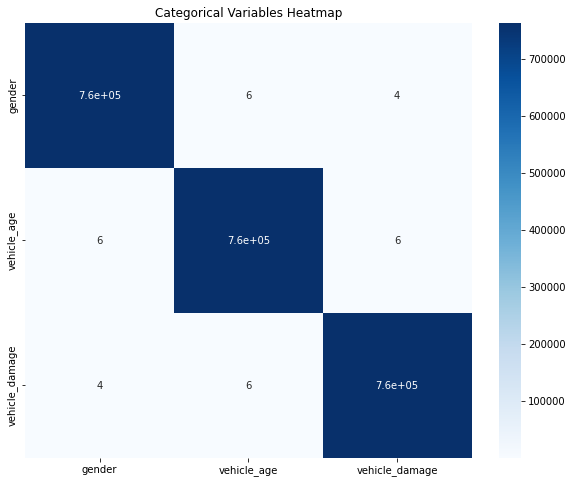

In [12]:
utils.plot_categorical_heatmap(dataframe = df_raw)

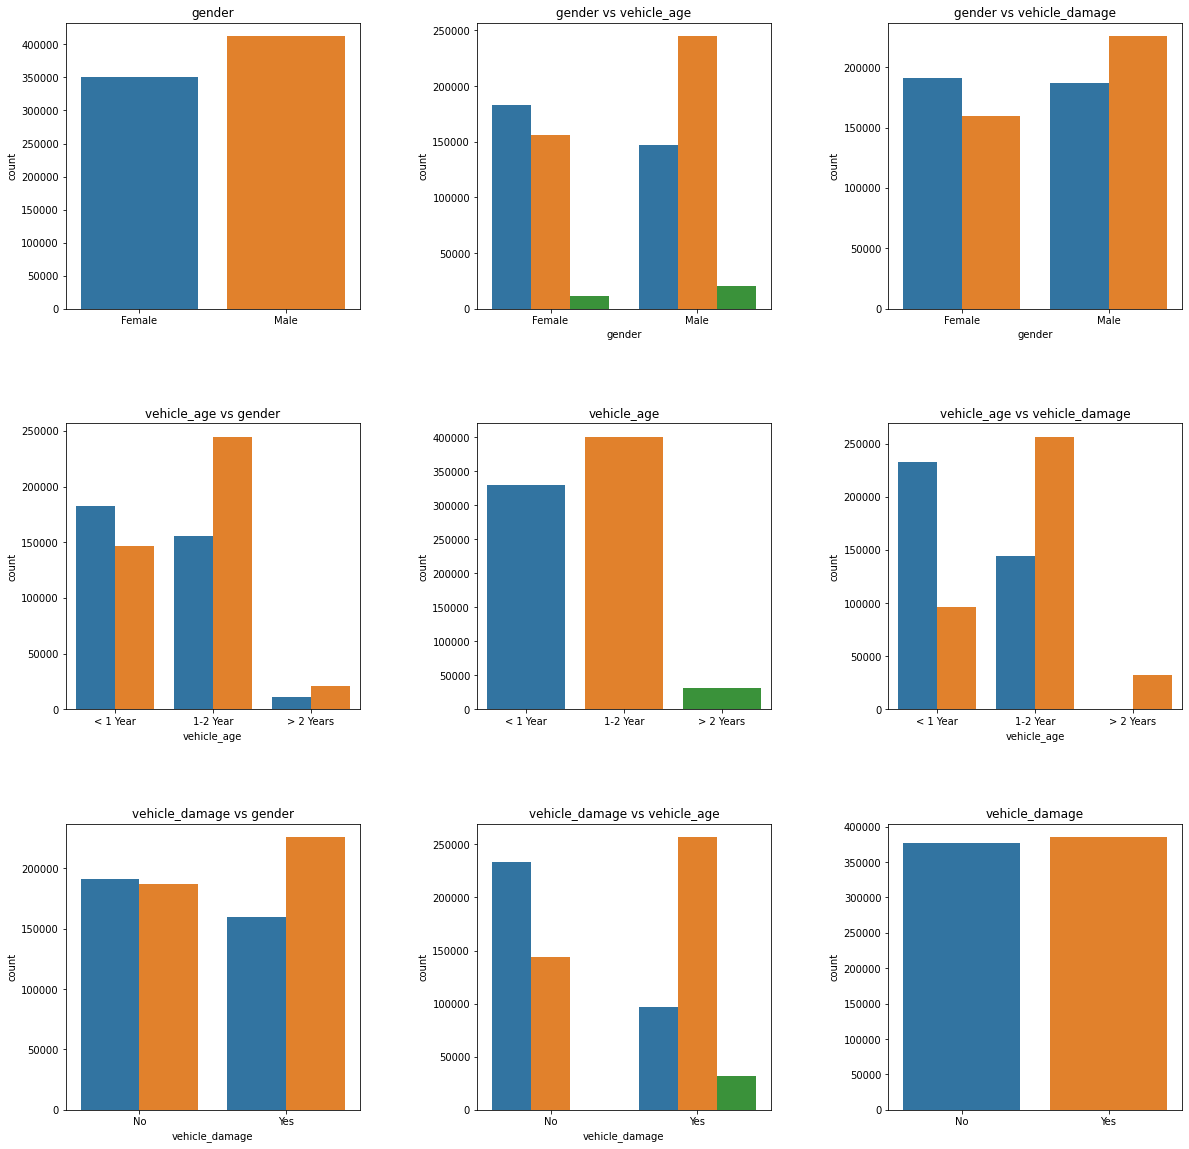

In [13]:
utils.plot_clustered_bars(dataframe = df_raw)

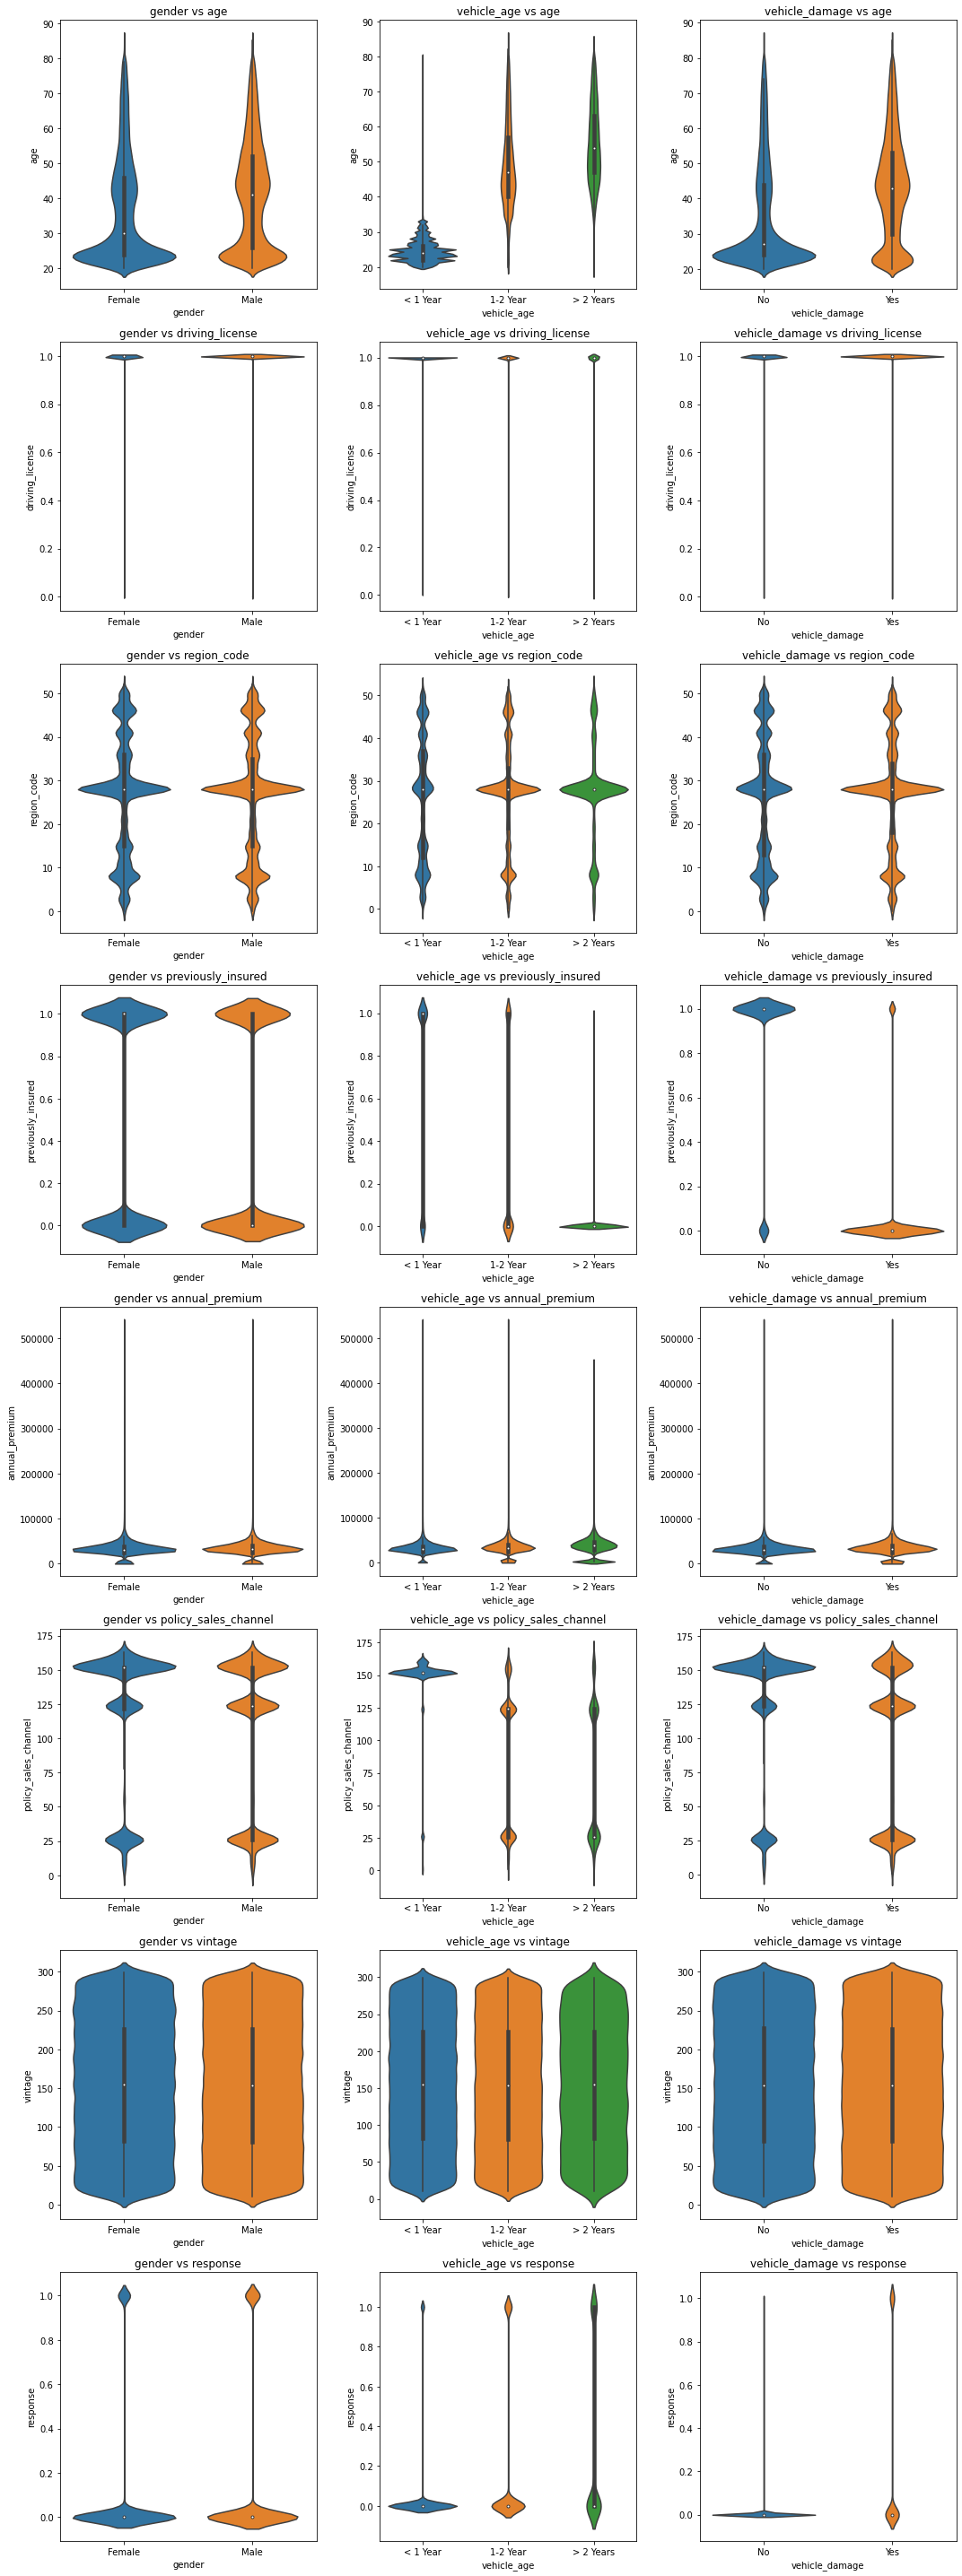

In [14]:
utils.plot_categorical_numerical_interactions(dataframe = df_raw)

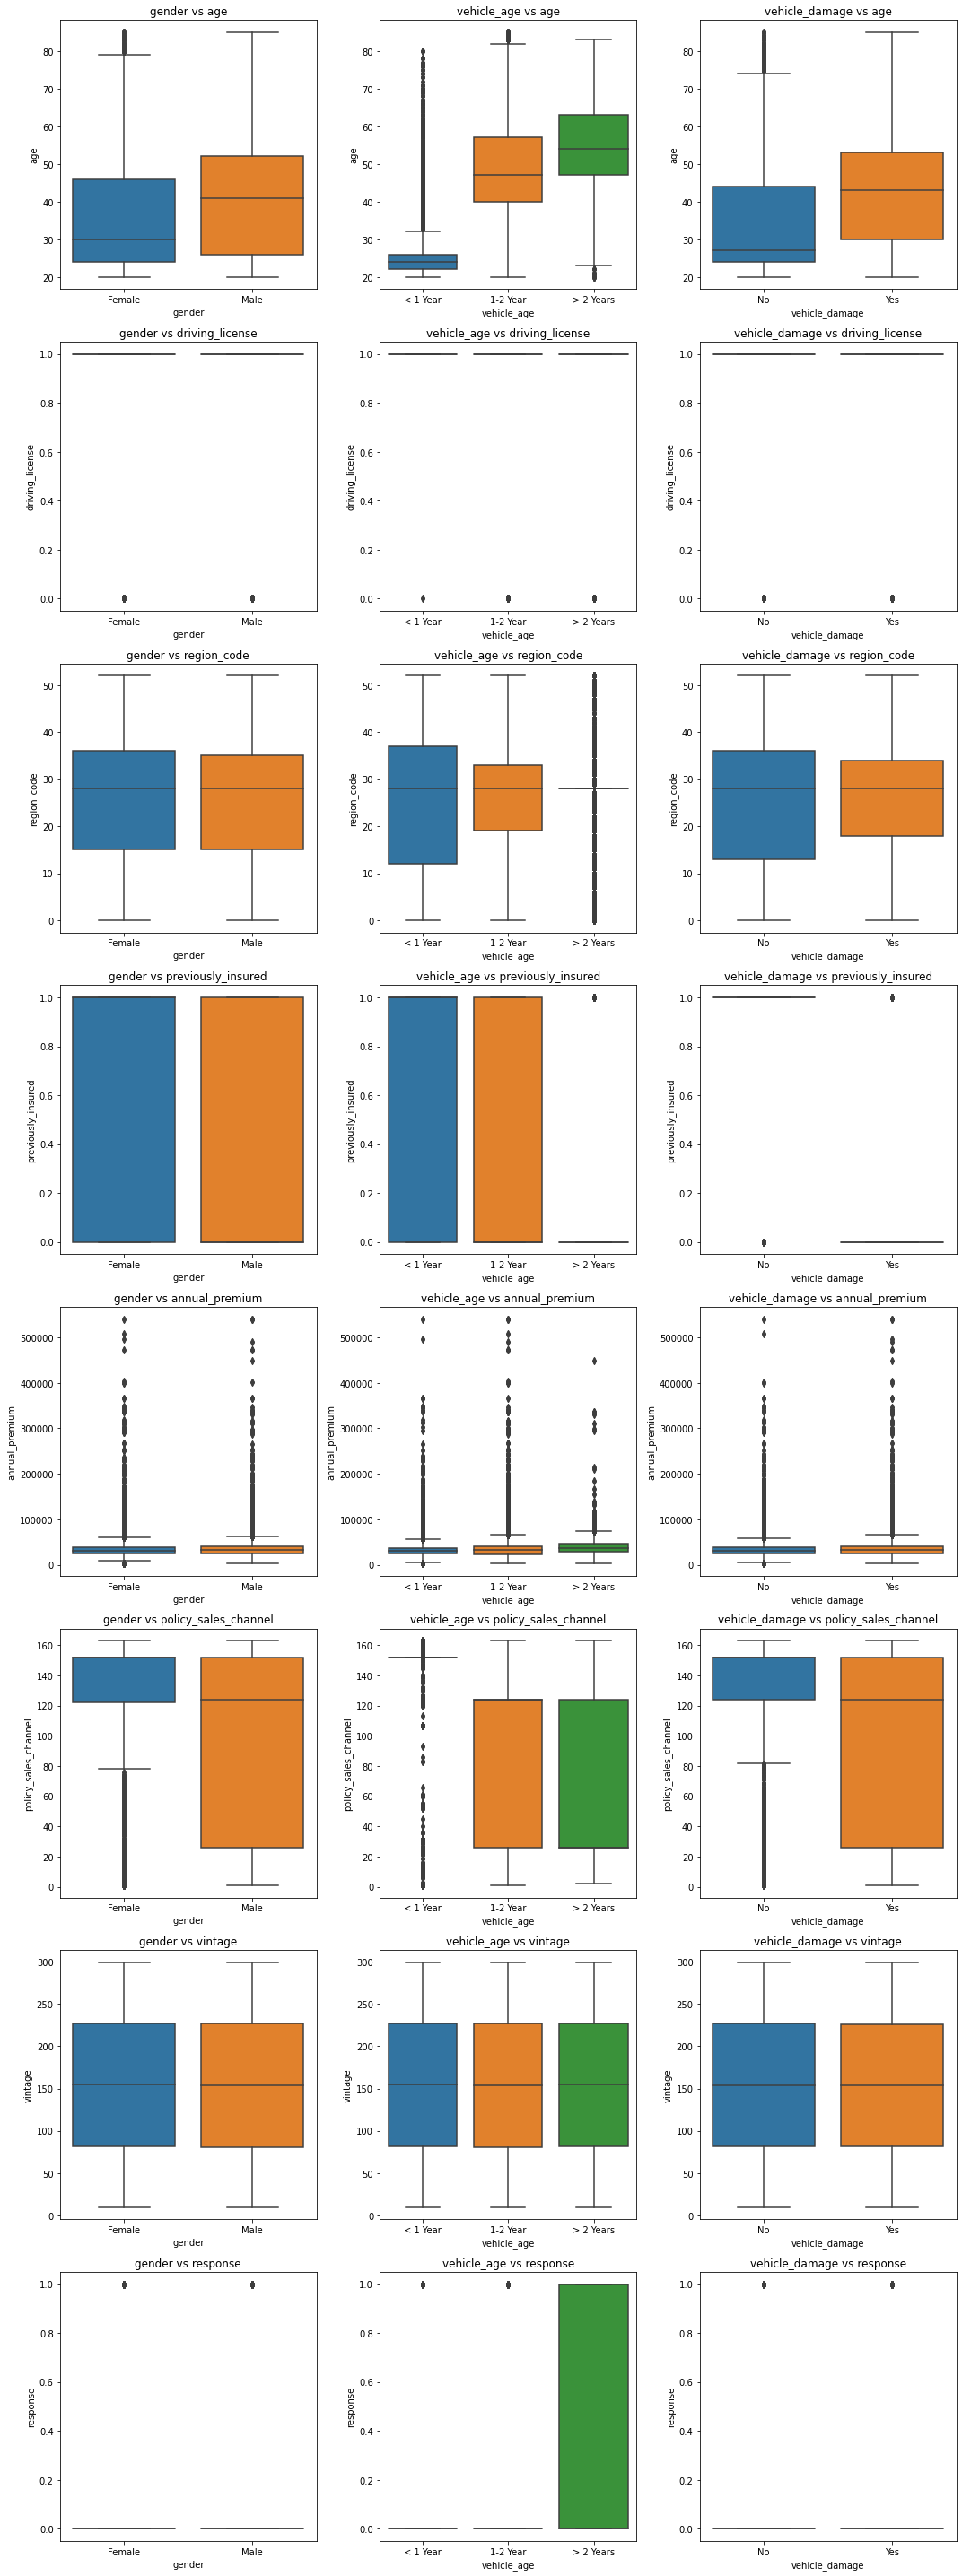

In [15]:
utils.plot_categorical_numerical_interactions(dataframe = df_raw, 
                                              plot_type = 'boxplot')

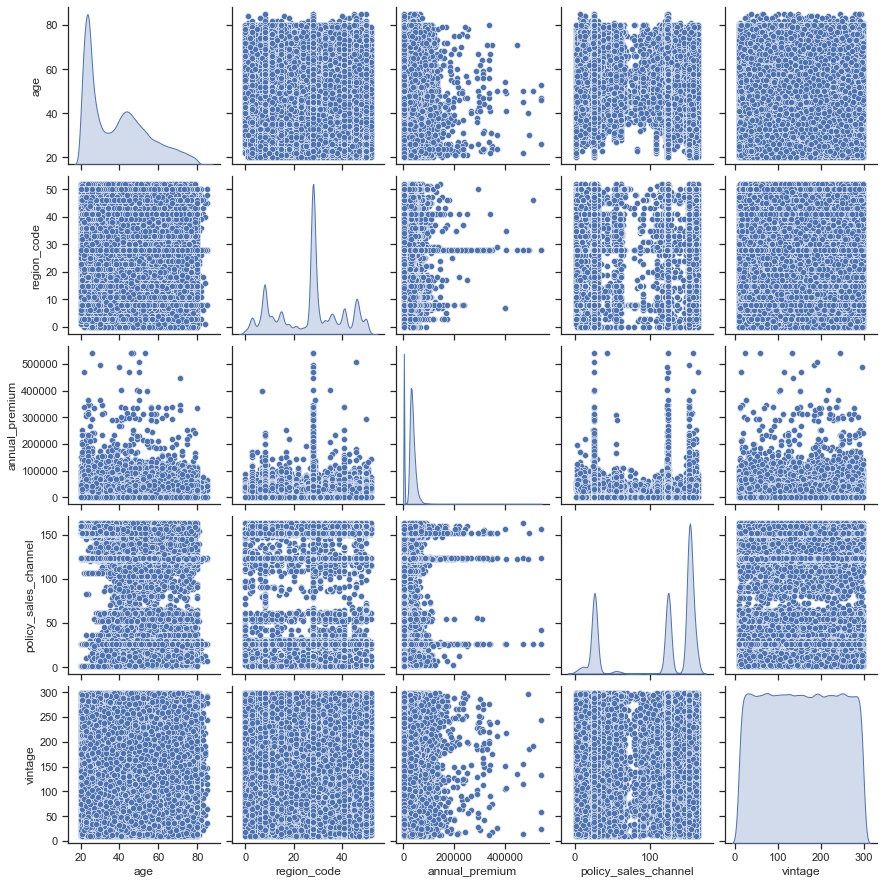

In [17]:
utils.scatterplot_matrix_numeric(dataframe = df_raw)

## Profile report

In [21]:
profile = ProfileReport(df_raw, title="Profiling Report")

In [22]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
profile.to_file("EDA_aux.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

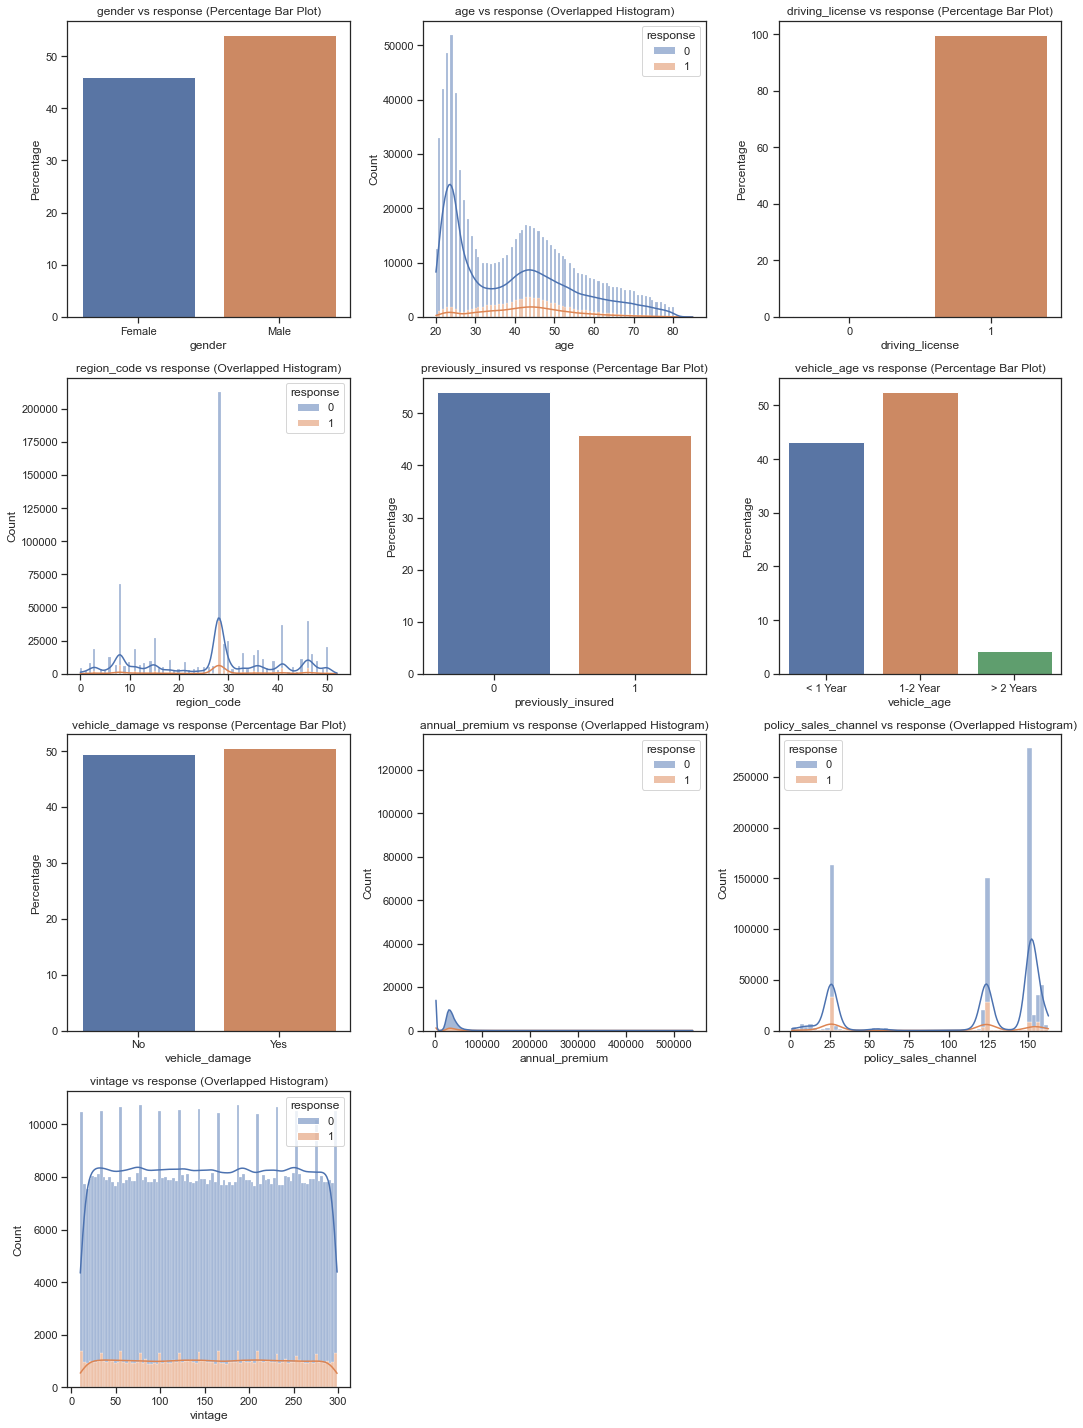

In [88]:
utils.plot_feature_vs_target(dataframe = df_raw, target_variable = 'response')